# Multivariate analysis - dependence matters!

It is rather rare that we only analyze a single asset in an isolated fashion. Usually, we are interested in multiple assets at the same time and how they interact with each other. An obvious example for financial market analysis is the creation of a portfolio which proportionally invests a notional amount $N$ among different assets. The weights can be equal for every asset. This is called a *naive* portfolio. However, the more general case is that the portfolio return is a linear combination of individual assets $r_{t, i}$ into which a fractional amount of $N$ - the weight $w_i$ - is invested. 

Thus, the portfolio return is a linear combination of random variables. In general, the expected value and variance for a linear combination of random variables can be determined as follows. 

For a weighted combination of random variables $x_1,x_2,…,x_n$​ with corresponding weights $w_1,w_2,…,w_n$​, the expected value of $y=w_1 x_1+ w_2 x_2+ … + w_n X_n$​ is calculated as:

$$
E(y) = E(w_1x_1 + w_2x_2 + \ldots + w_nx_n) = w_1 E(x_1) + w_2 E(x_2) + \ldots + w_n E(x_n)
$$

If the random variables are *independent*, the variance is given by:

$$
\text{Var}(y) = \text{Var}(w_1x_1 + w_2x_2 + \ldots + w_nx_n) = w_1^2\text{Var}(x_1) + w_2^2\text{Var}(x_2) + \ldots + w_n^2\text{Var}(x_n)
$$

However, if the random variables are not independent, pairwise covariances must be included into the variance calculation:

$$
\text{Var}(y) = \sum_{i=1}^n w_i^2 \text{Var}(x_i) + 2\sum_{i < j} w_iw_j \text{Cov}(x_i, x_j) = \sum_{i=1}^n w_i^2 \text{Var}(x_i) + \sum_{i \neq j} w_iw_j \text{Cov}(x_i, x_j)
$$

If we denote $\boldsymbol{w}, \boldsymbol{\mu}$ as the vector with weights expected values for each random variable and $\Sigma$ as the covariance matrix, the expected value and variance calculation can also be expressed using matrix notation by:

$$
\mu_y = \boldsymbol{w}^T \boldsymbol{\mu}
$$

$$
\sigma_y^2 = \boldsymbol{w}^T \Sigma \boldsymbol{w}
$$

$\Sigma$ includes individual variances on its diagonal and all pairwise covariances on its off-diagonal elements.

$$
\Sigma = 
\begin{pmatrix}
    \sigma_1^2 & \sigma_{12} & ... & \sigma_{1n} \\
    \sigma_{21} & \sigma_2^2 & ... & \sigma_{2n} \\
    \vdots & \ddots & & \vdots \\
    \sigma_{n1} & \sigma_{n2} & ... & \sigma_n^2 \\ 
\end{pmatrix}
$$

where $\sigma_{ij} = \sigma_{ji}$ is the covariance of asset $i$ and asset $j$. Thus, if we use these formulas to determine the expected value and variance of a portfolio $p$ with $n$ assets whose individual weights are denoted by $w_i$, the expected portfolio return is:

$$
\mu_p = w_1 \mu_1 + w_2 \mu_2 + ... + w_n \mu_n = \boldsymbol{w}^T \boldsymbol{\mu}
$$

and the portfolio variance is:

$$
\sigma_p^2 = \sum_i w_i^2 \sigma_i + \sum_{i \neq j} w_i w_j \sigma_{ij} = \boldsymbol{w}^T \Sigma \boldsymbol{w}
$$


This shows us that the expected value of a portfolio is the weighted average of the individual expected values. The variance of the portfolio consists of two parts. The first part is the weighted sum of individual asset variances. The higher the risk of individual assets in the portfolio, the higher its risk. The second part in the formula for variance calculation tells us that the portfolio variance (risk) further increases if covariance values are positive and higher. This is the case if two assets have (high) positive linear dependence. It tells us that our overall investment's risk increases, the more we invest into assets which have (high) positive linear dependence. At the same time this gives us opportunities to decrease risk by investing into asset with lower dependence. To demonstrate the importance of covariance and linear dependence among assets, respectively, we assume to hold a naive portfolio whose individual asset weights are $1/n$ for every asset. The formula for the portfolio variance is:

$$
\sigma_p^2 = \sum_i \frac{1}{n^2} \sigma_i^2 + \sum_{i \neq j} \frac{1}{n^2} \sigma_{ij}
$$

where $\sigma_i^2$ represents the $i$-th asset's variance and $\sigma_{ij}$ the covariance between asset $i$ and asset $j$. The formula can be rewritten to:

$$
\sigma_p^2 = \frac{1}{n^2} \sum_i \sigma_i^2 + \frac{1}{n^2} \sum_{i \neq j} \sigma_{ij} = \frac{n}{n^2} \bar{\sigma^2} + \frac{n (n-1)}{n^2} \bar{\sigma_{ij}} = \frac{1}{n} \bar{\sigma^2} + \frac{n-1}{n} \bar{\sigma_{ij}}
$$

where $\bar{\sigma^2}$ is the average variance and $\bar{\sigma_{ij}}$ is the average covariance. In the limit of the portfolio size, the portfolio variance converges to the average covariance.

$$
\lim_{n \to \infty} \sigma_p^2 = \underbrace{\frac{1}{n}}_{\to 0} \bar{\sigma^2} + \underbrace{\frac{n-1}{n}}_{\to 1} \bar{\sigma_{ij}} = \bar{\sigma_{ij}}
$$

Thus, the risk of large portfolios is mostly impacted by the asset's dependence and not by their individual risk.

## Analyzing and estimating dependencies

So far, I hopefully succeeded in demonstrating the importance of dependence. However, how can we examine dependencies among assets? A first step may include the empirical estimation of the covariance and correlation matrix. The empirical estimator for the pairwise covariance between two random numbers $x, y$, given $T$ observations, is defined by:

$$
\hat{\sigma}_{ij} = \frac{1}{T-1} \sum_{i=1}^T (x_i - \bar{x})(x_j - \bar{x_j})
$$

The variance is usually estimated by:

$$
\hat{\sigma}_x^2 = \frac{1}{T-1} \sum_{i=1}^T (x_i - \bar{x})^2
$$

The standardized version of covariance, is the pairwise correlation which is:

$$
\hat{\rho}_{ij} = \frac{\hat{\sigma}_{ij}}{\hat{\sigma}_i \hat{\sigma}_j} 
$$

```{note}
For matrix conversion, denote $R$ as the correlation matrix and $S$ a diagonal matrix whose values on the diagonal are the individual standard deviations. In general, these relationships hold for conversion of the covariance matrix to the correlation matrix and vice versa:

$$
R = S^{-1} \Sigma S^{-1} \\
\Sigma = S R S \\
$$
```

The cell below shows the empirical correlation matrix for a random sample of 15 Dow Jones companies. The correlation matrix is calculated based upon a history of five years for daily returns. It is quite common to observe positive correlation (and thus covariance) between the price development of stock market listed companies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

df_returns = pd.read_csv("../data/dow_returns.csv")
df_returns.Date = pd.to_datetime(df_returns.Date)
df_returns.set_index("Date", inplace = True)

np.random.seed(42)
rnd_dow_companies = list(np.random.choice(df_returns.columns, 10, replace = False))
df_returns.loc[:, rnd_dow_companies].corr()

,INTC,MCD,TRV,RTX,DD,PFE,MRK,HD,WMT,DIS
INTC,1.000000,0.377445,0.356910,0.355663,0.403607,0.277734,0.227937,0.484418,0.305090,0.401138
MCD,0.377445,1.000000,0.569247,0.558529,0.448362,0.281386,0.431183,0.575125,0.322118,0.465326
TRV,0.356910,0.569247,1.000000,0.579501,0.496593,0.313872,0.421817,0.490031,0.289579,0.396383
RTX,0.355663,0.558529,0.579501,1.000000,0.559017,0.307301,0.359159,0.455703,0.211090,0.498491
DD,0.403607,0.448362,0.496593,0.559017,1.000000,0.293702,0.305238,0.486843,0.234565,0.468881
PFE,0.277734,0.281386,0.313872,0.307301,0.293702,1.000000,0.452765,0.320811,0.275280,0.241857
MRK,0.227937,0.431183,0.421817,0.359159,0.305238,0.452765,1.000000,0.344409,0.291470,0.221384
HD,0.484418,0.575125,0.490031,0.455703,0.486843,0.320811,0.344409,1.000000,0.417894,0.490483
WMT,0.305090,0.322118,0.289579,0.211090,0.234565,0.275280,0.291470,0.417894,1.000000,0.245576
DIS,0.401138,0.465326,0.396383,0.498491,0.468881,0.241857,0.221384,0.490483,0.245576,1.000000


The covariance matrix can become quite confusing for a larger number of assets. In addition, one must examine all pairwise covariances and the indvidual variance per company. To get a first impression, it might be easier to take a look at a heatmap of the covariance matrix as shown below.

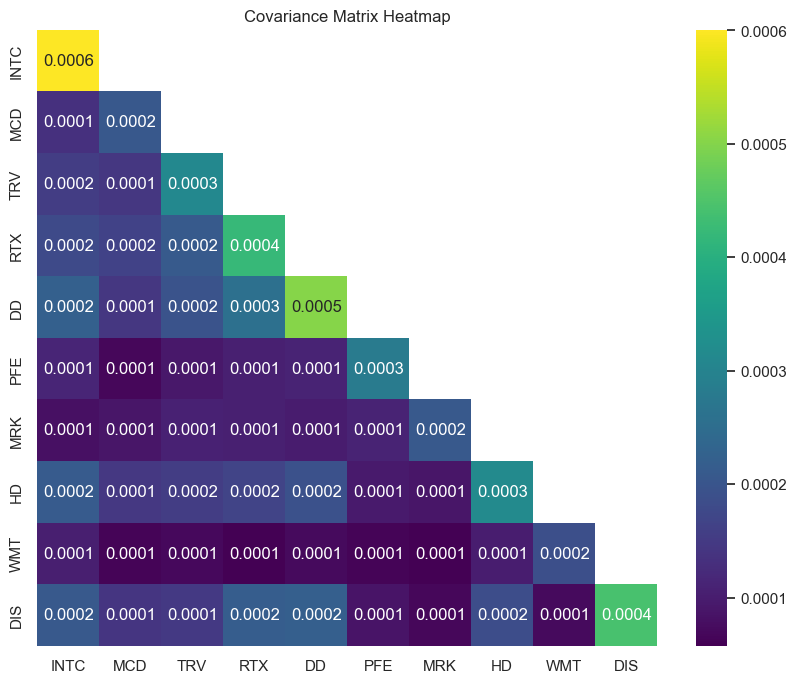

In [2]:
import seaborn as sns

cov_matrix = df_returns.loc[:, rnd_dow_companies].cov()
mask = np.triu(np.ones_like(cov_matrix, dtype=bool), k = 1)

sns.set_theme(style="white")
plt.figure(figsize = (10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".4f", cmap="viridis", cbar=True, mask=mask)
plt.title("Covariance Matrix Heatmap")
plt.show()


However, this approach is only reasonable if the number of assets stays at a lower number. If the number of assets increases, we may take a look at average pairwise correlation or covariance, respectively. This is demonstrated in the cell below and would show us that the Home Depot (HD) is on average the company with the highest pairwise dependence and Walmart (WMT) the company with the lowest level of pairwise dependence. 

In [3]:
avg_covariance = (cov_matrix - np.diag(np.diag(cov_matrix))).sum(axis = 1) / (cov_matrix.shape[0] - 1)
corr_mat = df_returns.loc[:, rnd_dow_companies].corr()
avg_correlation = (corr_mat - np.diag([1] * cov_matrix.shape[0])).sum(axis = 1) / (corr_mat.shape[0] - 1)

print(f"Average covariance:\n{avg_covariance}\n")
print(f"Average correlation:\n{avg_correlation}\n")

Average covariance:
INTC    0.000156
MCD     0.000121
TRV     0.000142
RTX     0.000163
DD      0.000168
PFE     0.000094
MRK     0.000089
HD      0.000149
WMT     0.000073
DIS     0.000149
dtype: float64

Average correlation:
INTC    0.354438
MCD     0.447636
TRV     0.434882
RTX     0.431606
DD      0.410756
PFE     0.307190
MRK     0.339485
HD      0.451746
WMT     0.288074
DIS     0.381058
dtype: float64



But what about a more global perspective, i.e., how are these assets related to the universe of all assets or sub-groups (such as industries)? Furthermore, while covariance and correlation are measures of co-movement, they do not deepen our understanding why assets show similar developments. This why factor models are discussed in the end of this chapter subchapter. They enable us to identify the dependence level of a single asset more globally. Next, we are going to take a look at other ways to quantify pairwise dependencies.

## Dependence beyond covariance

So far, we exclusively examined dependence by means of covariance which is only able to quantify linear dependence, however, is a biased dependence estimator, given a non-linear relationship between two random variables exists. An example of non-linear dependence is shown in the plot below. Linear dependence implies an identical change in the variables, given one changes by one unit. This is not true for non-linear relationships. In the example below, depending on the current value, the change of one variable is different if the other changes by one unit. 

Such relationships can lead to unexpected events in real-life applications, because large changes occur, given certain threshold levels are exceeded. For instance, assume a bank experiences predictable losses from credit contracts during average economic conditions. However, once the economic conditions worsen and fall below critical levels, a chain reaction of under-performing companies may lead to a burst in company defaults and a exponential alike increase in its credit portfolio loss. Another example would be a large stock price deterioration, once the overall market drops below a certain level. The economic reasoning for such events could resemble investor's belief that the company's business is not able to bear very adverse market conditions. 

As we can see in the graphic below, the estimate for linear correlation is not equal to one in the right plot, even if the data points $x, y$ are linked by a deterministic relationship only, i.e., $y = e^{\lambda x}$. Consequently, if we would not be able to examine the visualization, our interpretation regarding the correlation coefficient would tempt us to underestimate the level of dependence. To overcome such mis-specifications of the dependence level, we may want to add other dependence metrics to our analysis. Two popular options are Kendall's Tau and Spearman's rank correlation. Both have in common, that they do not use the values of the variables, but, the rank of the values, to quantify dependence. 

### Spearman's correlation and Kendall's Tau

Let $ \text{rg}\left( x_i \right)$ be the rank of $x_i$, then Spearman's rank correlation is defined by:

$$
\rho_{sp} = \frac{\sigma_{ij} \left( \text{rg}\left( x_i \right), \text{rg}\left( x_j \right) \right)}{\sigma_i \left( \text{rg}\left( x_i \right) \right) \sigma_j \left( \text{rg}\left( x_j \right) \right)}
$$

which shows that it basically is the Bravais-Pearson coefficient, however, using the ranks and not the realizations. 

To define Kendall's Tau, we need to introduce the concept of concordance and discordance. Given two observations of two random variables $x_i, x_j$ and $x_i^*, x_j^*$, the observations are concordant if $\left( x_i - x_i^* \right)\left( x_j - x_j^* \right) > 0$. This is true if $ x_i > x_i^*$ and $ x_j > x_j^*$ or if $ x_i < x_i^*$ and $ x_j < x_j^*$. Accordingly the observations are discordant if $\left( x_i - x_i^* \right)\left( x_j - x_j^* \right) < 0$. Theoretically, Kendall's Tau is defined by:

$$
\rho_{\tau} = E \left[ \operatorname{sgn} \left( \left( x_i - x_i^* \right)\left( x_j - x_j^* \right) \right) \right]
$$

with the definition of the $\operatorname{sgn}$ function

$$
\operatorname{sgn}(x) =
\begin{cases} 
1 & \text{if } x > 0 \\
0 & \text{if } x = 0 \\
-1 & \text{if } x < 0 
\end{cases}
$$

we find that $\rho_{\tau}$ quantifies the expected number of concordant and discordant pairs, respectively. If you take a look in the plots below, you can see, that Spearman's correlation coefficient and Kendall's Tau both are able to identify the level of absolute dependence for the non-linear relationship in the right plot. 

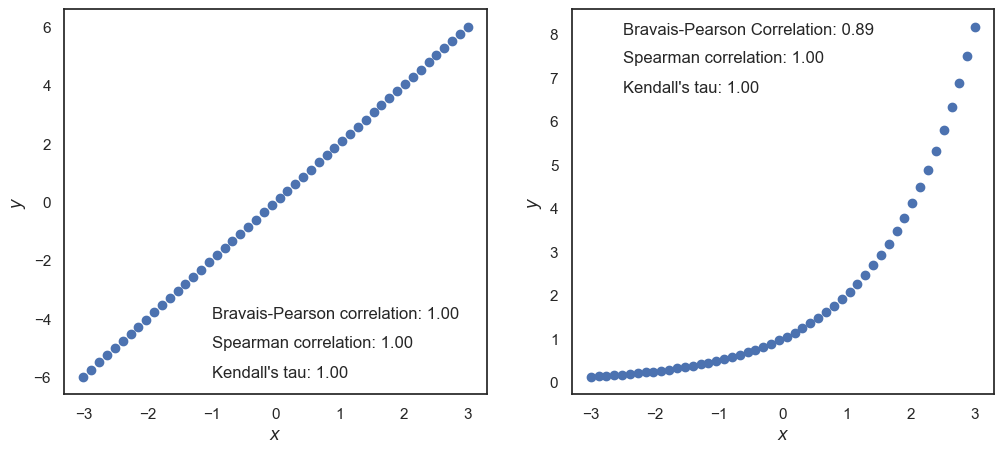

In [4]:
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import spearmanr, kendalltau

x = np.linspace(-3, 3, 50)
y_linear = 2 * x
y_nonlinear = np.exp(0.7*x)

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].scatter(x, y_linear)
axs[1].scatter(x, y_nonlinear)
axs[0].text(-1, -4, f"Bravais-Pearson correlation: {np.corrcoef(x, y_linear)[0, 1]:.2f}")
axs[0].text(-1, -5, f"Spearman correlation: {spearmanr(x, y_linear)[0]:.2f}")
axs[0].text(-1, -6, f"Kendall's tau: {kendalltau(x, y_linear)[0]:.2f}")
axs[1].text(-2.5, 8, f"Bravais-Pearson Correlation: {np.corrcoef(x, y_nonlinear)[0, 1]:.2f}")
axs[1].text(-2.5, 7.35, f"Spearman correlation: {spearmanr(x, y_nonlinear)[0]:.2f}")
axs[1].text(-2.5, 6.65, f"Kendall's tau: {kendalltau(x, y_nonlinear)[0]:.2f}")
axs[0].set_xlabel(r"$x$")
axs[0].set_ylabel(r"$y$")
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$y$")
plt.show()

Below, we take a look at the Bravais-Pearson correlation, Spearman correlation and Kendall's Tau matrix for our asset return example. While the latter is difficult to compare, especially, the comparison of Bravais-Pearson and Spearman correlation indicates the potential underestimation of dependencies between the asset returns of these five stock market companies. The reason for this often lies in the tails of the multivariate distributions, i.e., the dependence of extreme co-movements of asset returns is not fully captured by the concept of linear dependence. Thus, let us take a look at the impact of tail dependence and its definition.

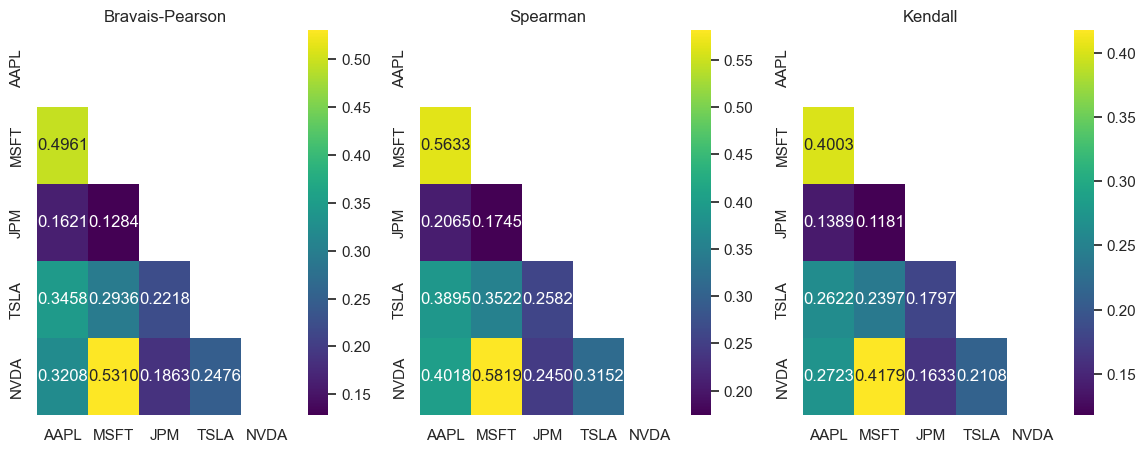

In [5]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv("../data/sp500_1y.csv", index_col = "Unnamed: 0")
df.index = pd.to_datetime(df.index)

companies = ["AAPL", "MSFT", "JPM", "TSLA", "NVDA"]
corr_mat = df.loc[:, companies].corr()
spearman_mat = df.loc[:, companies].corr(method = "spearman")
kendall_mat = df.loc[:, companies].corr(method = "kendall")

mask = np.triu(np.ones_like(corr_mat, dtype=bool), k = 0)

fig, axs = plt.subplots(1, 3, figsize = (14, 5))
sns.heatmap(corr_mat, cmap = "viridis", annot=True, fmt=".4f", mask = mask, ax = axs[0])
sns.heatmap(spearman_mat, cmap = "viridis", annot=True, fmt=".4f", mask = mask, ax = axs[1])
sns.heatmap(kendall_mat, cmap = "viridis", annot=True, fmt=".4f", mask = mask, ax = axs[2])
axs[0].set_title("Bravais-Pearson")
axs[1].set_title("Spearman")
axs[2].set_title("Kendall")
plt.show()

### Tail dependence

All dependence measures presented so far quantify the overall level of dependence between two variables. Another point of view on dependence is tail dependence which focuses on the dependence of extreme outcomes for random variables. The coefficient of lower tail dependence between two random variables $x_i$ and $x_j$ is defined as:

$$
\lambda_L = \lim_{\alpha \to 0^+} P(x_j \leq x_{\alpha, j} \mid x_i \leq x_{\alpha, i})
$$

if the limit exists. As before, $x_{\alpha, i}, x_{\alpha, j}$ represent the quantiles of $x_i$ and $x_j$. Accordingly, upper tail dependence is defined by:

$$
\lambda_U = \lim_{\alpha \to 1^-} P(x_j > x_{\alpha, j} \mid x_i > x_{\alpha, i})
$$

The tail coefficients can be estimated by:

$$
\hat{\lambda}_L = \frac{1}{k} \sum_{i} \mathbf{1}\left( x_i \leq x_i^{(k)}, x_j \leq x_j^{(k)} \right)
$$

where $k = \lfloor T \alpha \rfloor$, $\alpha$ is a small probability level, $x_i^{(k)}$ and $x_j^{(k)}$ are the $k$-th order statistics of $x_i$ and $x_j$, and $\mathbf{1}(\cdot)$ is the indicator function. For the upper tail dependence we have:
 
$$
\hat{\lambda}_U = \frac{1}{k} \sum_{i} \mathbf{1}\left( x_i > x_i^{(k^*)}, x_j > x_j^{(k^*)} \right)
$$

where $ k^* = \lfloor T (1 - \alpha) \rfloor $. Note that the smaller we set $\alpha$ the more exposed are the estimators to statistical uncertainty as only a little number of observations falls below and above the corresponding order statistics. 

The matrix below exhibits lower tail dependence estimates for $\alpha = 0.05$ in the lower triangular matrix and upper tail dependence estimates in the upper triangular matrix. We observe asymmetry between lower and upper tail dependencies, the former being higher on average. This is an important implication which indicates that joint adverse developments seem to be happen more often than their positive counterparts. 

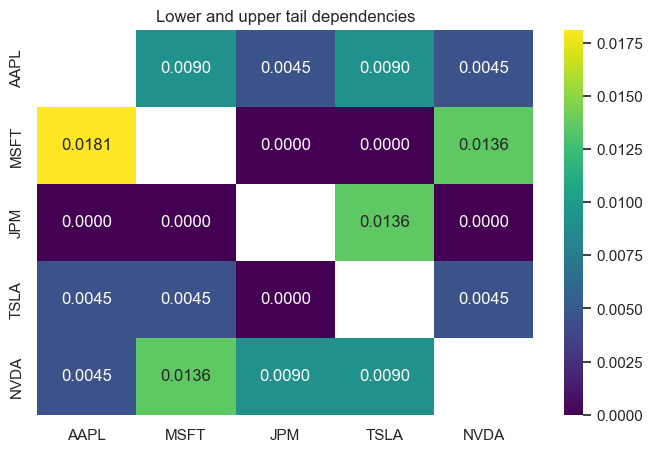

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

def empirical_tail_dependence(df, x, y, alpha):
    n = df.shape[0]
    
    X, Y = df.loc[:, x].values, df.loc[:, y].values
    
    # Calculate empirical lower tail dependence
    k_lower = int(np.floor(n * alpha))
    X_sorted = np.sort(X)
    Y_sorted = np.sort(Y)
    X_k = X_sorted[k_lower]
    Y_k = Y_sorted[k_lower]
    
    lambda_L = np.mean((X <= X_k) & (Y <= Y_k))
    
    # Calculate empirical upper tail dependence
    k_upper = int(np.floor(n * (1 - alpha)))
    X_k_upper = X_sorted[k_upper]
    Y_k_upper = Y_sorted[k_upper]
    
    lambda_U = np.mean((X > X_k_upper) & (Y > Y_k_upper))
    
    return lambda_L, lambda_U

lu_coefs = np.zeros(shape = (len(companies), len(companies)))

for i in range(len(companies)):
    for j in range(i+1, len(companies)):
        l, u = empirical_tail_dependence(df, companies[i], companies[j], 0.05)
        lu_coefs[j, i] = l
        lu_coefs[i, j] = u
        

lu_coefs = pd.DataFrame(lu_coefs, index = companies, columns = companies)

fig, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(lu_coefs, ax = ax, cmap = 'viridis', annot=True, fmt=".4f", mask = np.eye(len(companies)))
ax.set_title("Lower and upper tail dependencies")
plt.show()

## Parametric models for multivariate data

The previous observations indicate the following characteristics for multivariate asset return distributions

* Overall asset returns seem to exhibit positive dependence
* Dependencies maybe non-linear to a certain extent

So what is a model which captures empirical characteristics of multivariate financial data. As for the univariate case, the multivariate normal distribution is often used for its mathematical properties, however, as we are going to experience usually fails to capture some characteristice, i.e., non-linear and tail depenence. Nevertheless, it serves as a good starting point. 

Assuming a multivariate normal distribution for asset returns, the parametric model is fully defined by the vector of expected values $\boldsymbol{\mu}$ and the covariance matrix $\Sigma$. The density function for a multivariate normal distribution is given by:

$$
f(\mathbf{x}) = \frac{1}{(2\pi)^{n/2} |\mathbf{\Sigma}|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \right)
$$

where:

- $\mathbf{x}$ is the $n$ dimensional vector representing the random variables
- $\mathbf{\mu}$ is a $n$ dimensional vector including the expected values of random variables
- $\mathbf{\Sigma}$ is the $n \times n$ covariance matrix
- $|\mathbf{\Sigma}|$ denotes the determinant of the covariance matrix $\mathbf{\Sigma}$.

In the cell below, we use the empirical estimates $\hat{\boldsymbol{\mu}}, \hat{\Sigma}$ for the data example from above to define a multivariate normal distribution and sample data from this parametric model with the same number of observations as for the real data set. To demonstrate the failure of capturing, e.g., tail dependencies adequately, we proceed as follows.

For every sampled data set, we count the number of observations at which a company pair experiences return realizations lower than its 5\% quantile at the same time. I.e., let $r_{0.05, i}, r_{0.05, j}$ be the 5\% quantiles of asset $i$ and asset $j$, we determine:

$$
\sum_{i, j = 1}^T \boldsymbol{1}\left(r_{t, i} < r_{0.05, i}\right) \boldsymbol{1}\left(r_{t, j} < r_{0.05, j}\right)
$$

This is repeated for $1,000$ times and we use the average number of observations for every pair as an estimate of the expected number of observations with joint-realizations below the 5\% quantile. These numbers can be seen in the left lower triangular matrix and should be contrasted to the right triangular matrix which exhibits the actual number of observations. We observe that the actual number of days with rather extreme negative joint-developments of the assets (on a pairwise level) is higher than we would expect if the data generating process would be as defined by a multivariate normal distribution. This is very similar to the univariate analysis which revealed the missing ability of the normal distribution to capture extreme events in the tails of the distribution. The multivariate distribution additionally seems to underestimate the joint occurrences of extreme events. 

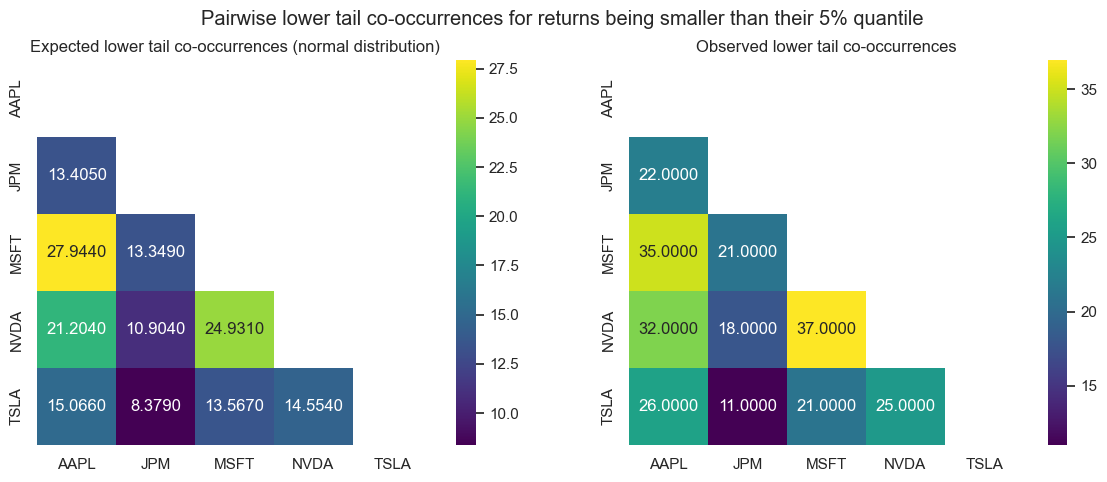

In [7]:
import pandas as pd
from scipy.stats import multivariate_normal
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

def lower_pair_freqs(df, x, y, alpha):
    x = df.loc[:, x]
    y = df.loc[:, y]
    q_x = x.quantile(alpha)
    q_y = y.quantile(alpha)

    return np.sum((x <= q_x) & (y <= q_y))

df = pd.read_csv("../data/AAPL_MSFT_JPM_TSLA_NVDA_5y.csv", index_col = "Date")
df.index = pd.to_datetime(df.index)
companies = df.columns.tolist()

estimated_mean = np.mean(df, axis=0)
estimated_cov = np.cov(df, rowvar=False)

rv = multivariate_normal(estimated_mean, estimated_cov)

lower_tail_occurrences_sim_runs = []
for _ in range(1000):
    sim_data = pd.DataFrame(rv.rvs(size = df.shape[0]), columns = companies)
    lower_tail_co_occurrences = np.zeros(shape = (len(companies), len(companies)))

    for i, c1 in enumerate(companies):
        for j, c2 in enumerate(companies):
            lower_tail_co_occurrences[i, j] = lower_pair_freqs(sim_data, c1, c2, 0.05)
    lower_tail_occurrences_sim_runs.append(lower_tail_co_occurrences)

avg_lower_tail_occurrences = np.array(lower_tail_occurrences_sim_runs).mean(axis = 0)

lower_tail_co_occurrences = np.zeros(shape = (len(companies), len(companies)))
for i, c1 in enumerate(companies):
    for j, c2 in enumerate(companies):
        lower_tail_co_occurrences[i, j] = lower_pair_freqs(df, c1, c2, 0.05)



fig, axs = plt.subplots(1, 2, figsize = (14, 5))

mask = np.triu(np.ones_like(avg_lower_tail_occurrences, dtype=bool), k = 0)

#sns.set_theme(style="white")
sns.heatmap(pd.DataFrame(avg_lower_tail_occurrences, index = companies, columns = companies), annot=True, fmt=".4f", cmap="viridis", cbar=True, mask=mask, ax = axs[0])
sns.heatmap(pd.DataFrame(lower_tail_co_occurrences, index = companies, columns = companies), annot=True, fmt=".4f", cmap="viridis", cbar=True, mask=mask, ax = axs[1])

axs[0].set_title("Expected lower tail co-occurrences (normal distribution)")
axs[1].set_title("Observed lower tail co-occurrences")
fig.suptitle("Pairwise lower tail co-occurrences for returns being smaller than their 5% quantile")
plt.show()

### The multivariate t distribution

So, if the multivariate normal distribution is not capturing tail dependencies adequately, we are in need of alternatives. One is given with the multivariate t distribution. Its density is defined by:

$$
f(\mathbf{x}) = \frac{\Gamma\left(\frac{\nu + k}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right) (\nu \pi)^{k/2} |\mathbf{\Sigma}|^{1/2}} \left(1 + \frac{1}{\nu} (\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \right)^{-\frac{\nu + k}{2}}
$$

where:

- $\nu$ is the degrees of freedom.
- $\Gamma(\cdot)$ is the Gamma function.

The multivariate t distribution exhibits tail dependence in comparison to the multivariate normal distribution whose tails are asymptotic independent. The lower the degrees of freedom, the higher the lower and upper tail dependence. For a pair, the coefficients can be determined by:

$$
\lambda_{L, U} = 2t_{\nu+1}\left(-\sqrt{\frac{(\nu+1)(1-\rho)}{1+\rho}}\right)
$$

where $t_{\nu+1}(\cdot)$ denotes the cumulative distribution function (CDF) of a univariate $t$-distribution with $\nu+1$ degrees of freedom. The impact of $\nu$ on the level of tail dependence also depends on the correlation as shown in the plot below for a feq selected values of $\rho$ and $\nu$.

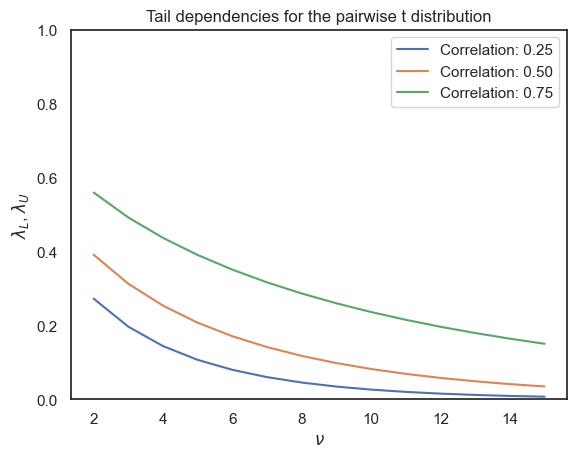

In [8]:
import numpy as np
from scipy.stats import t

def pairwise_tail_dependence(nu, rho):
    argument = -np.sqrt((nu + 1) * (1 - rho) / (1 + rho))
    lambda_lu = 2 * t.cdf(argument, df=nu + 1)
    
    return lambda_lu

rhos = [0.25, 0.50, 0.75]
nus = np.arange(2, 16)

fig, ax = plt.subplots()
for rho in rhos: 
    tail_deps = [pairwise_tail_dependence(nu, rho) for nu in nus]
    ax.plot(nus, tail_deps, label = f"Correlation: {rho:.2f}")
ax.legend()
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\nu$")
ax.set_ylabel(r"$\lambda_L$, $\lambda_U$")
ax.set_title("Tail dependencies for the pairwise t distribution")
plt.show()

However, two shortcomings are of importance. (1) the multivariate t distribution is only able to capture symmetric tail dependencies, i.e., $\lambda_L = \lambda_U$. For our empirical example, we have seen that in tendency $\lambda_L > \lambda_U$ for asset return data. (2), $\nu$ is the same value for every pair, thus, the same level of tail dependence would be determined if we estimate the multivariate distribution to more than two asset returns at once. 

This is why it is recommended to estimate the pairwise t distributions in order to have a separate estimate for $\nu$ for every pair. This is only becomes insufficient if one whishes to determine probabilities or simulate data for more than two companies at once. If this is the aim, one needs to look towards more flexible approaches such as *copula* models.

### Copulas

Due to the time limitation of this course, we are not talk about copula models in detail, however, as they are very popular w.r.t. the measurement of tail dependencies, we want to quickly take a look at what they are.

Copula functions are a way to split the multivariate distribution into its univariate (also called marginal) distributions and their dependencies. More formal, Sklar's theorem states that for any $n$-dimensional cumulative distribution function (CDF) $F$ with marginal CDFs $F_1, F_2, \ldots, F_n$, there exists a copula $C$ such that for all $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ in $\mathbb{R}^n$,

$$
F(x_1, x_2, \ldots, x_n) = C(F_1(x_1), F_2(x_2), \ldots, F_n(x_n)).
$$

Conversely, if $C$ is a copula and $F_1, F_2, \ldots, F_n$ are CDFs, then the function $F$ defined by the above equation is a joint CDF with margins $F_1, F_2, \ldots, F_n$. Note that all $F_i(x_i) \in [0, 1]$ as these are the probabilities $P(X_i \leq x_i)$. All information of the univariate variable is processed by $F_i$. The output of the CDFs is the input for $C$ which is a function that defines the dependence among the variables, i.e., aspects such as the strength, linearity, non-linearity and tail dependencies, respectively. 

If we use the empirical CDF for the marginal distributions, we only need to estimate the parameters for the copula function. For many copula functions, tail dependencies can be analytically calculated. This is why copulas are often used to estimate the level of tail dependence. A broad range of different copula families exist allowing for a great level of flexibility regarding the dependence structure. 

To demonstrate this, we first calculate the input for the copula models by simply applying the empirical distribution function to every marginal distribution which transforms all asset returns in the value range $[0, 1]$. The pairwise scatter plot visualizes this data and we already detect the strongest level of dependence in the tails for the pair of Apple and Microsoft.

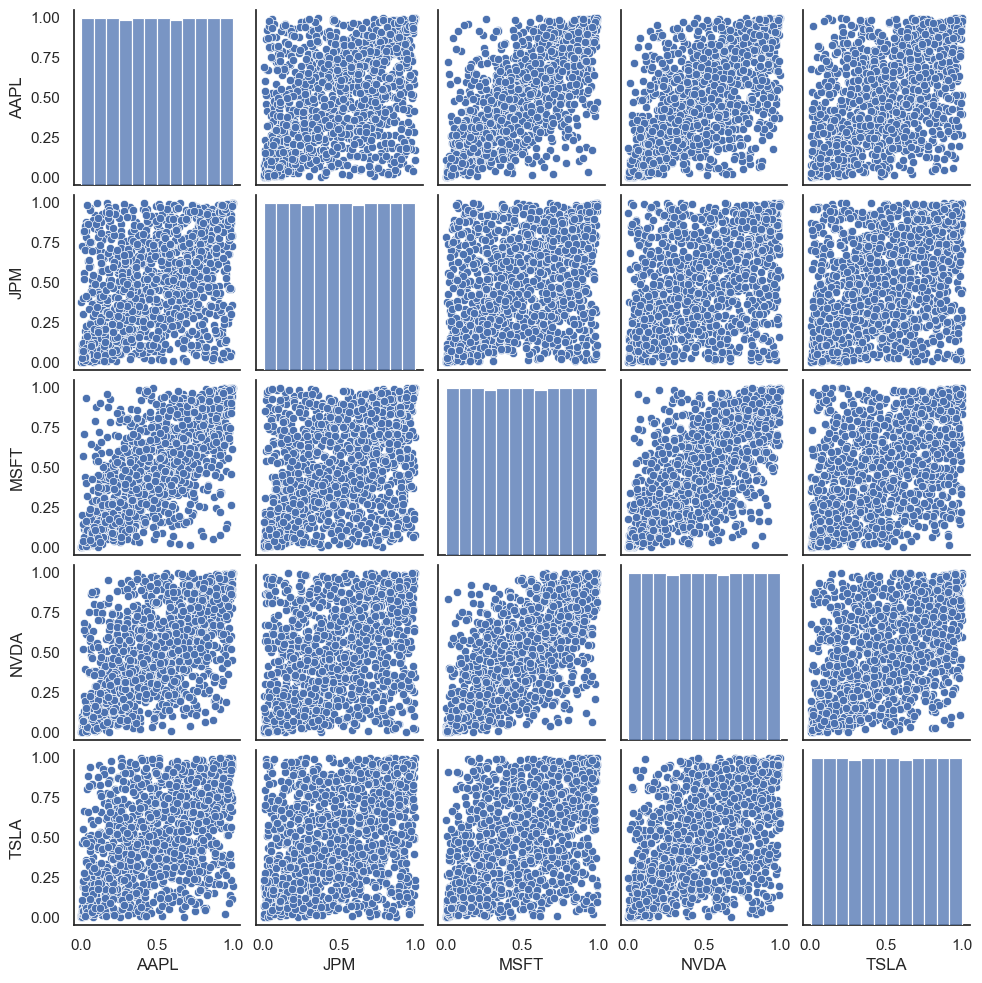

In [9]:
import seaborn as sns
import matplotlib.pylab as plt

df_pseudo_U = df.rank().divide(df.shape[0] + 1)

sns.pairplot(df_pseudo_U, height = 2)
plt.show()

Next, the parameters for all pairwise t copulas are estimated by maximum likelihood estimation. This is the corresponding copula to the multivariate t distribution, however, without the need for the marginal distributions being t distributed as well. The parameters for a pairwise copula are $\rho$ and $\nu$. As for the multivariate t distribution, $\rho$ quantifies the level of dependence and $\nu$ is related to the level of tail dependence. Tail dependence for lower and upper tail dependence are symmetric. The matrix below shows the level of tail dependence when this is calculated based upon the estimated values $\hat{\rho}$ and $\hat{\nu}$. Note that these values completely differ from their empirical estimates. This is not surprising as the theoretical values are limits for the outer tail levels. Furthermore, we can confirm that tail dependencies seem to be the highest between Apple and Microsoft. This is an important information, because holding both companies increases the risk of observing extremely large deviations from the mean on the same point in time. Especially with respect to the lower tails of the distribution, this can be an important information for risk management and portfolio monitoring. 

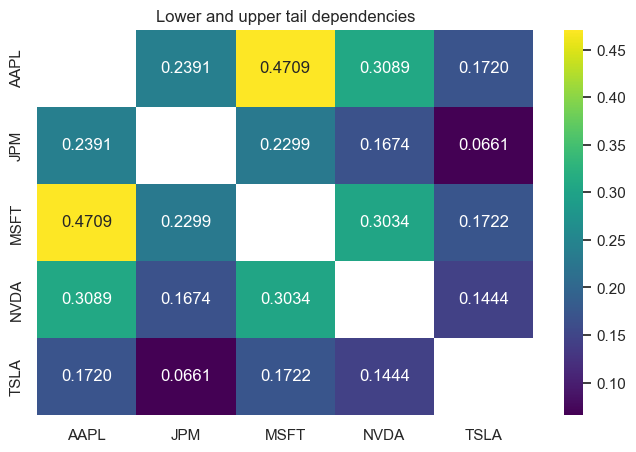

In [10]:
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import FloatVector
from rpy2.robjects import pandas2ri

# Activate the automatic conversion between R and pandas DataFrames
pandas2ri.activate()

# Import R's utility package to install missing packages
utils = rpackages.importr('utils')

# Load the VineCopula package
VineCopula = rpackages.importr('VineCopula')

def t_copula_estimate(df_U, x, y):
    u1, u2 = FloatVector(df_U.loc[:, x]), FloatVector(df_U.loc[:, y])
    student_copula = VineCopula.BiCopEst(u1, u2, family = 2)
    rho = student_copula[1]
    nu = student_copula[2]
    return rho, nu

lu_coefs = np.zeros(shape = (len(companies), len(companies)))

for i in range(len(companies)):
    for j in range(i+1, len(companies)):
        rho_tmp, nu_tmp = t_copula_estimate(df_pseudo_U, companies[i], companies[j])
        lambda_ = pairwise_tail_dependence(nu_tmp, rho_tmp)[0]
        lu_coefs[j, i] = lambda_
        lu_coefs[i, j] = lambda_
        
lu_coefs = pd.DataFrame(lu_coefs, index = companies, columns = companies)

fig, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(lu_coefs, ax = ax, cmap = 'viridis', annot=True, fmt=".4f", mask = np.eye(len(companies)))
ax.set_title("Lower and upper tail dependencies")
plt.show()

## Modern portfolio theory

As we have seen different ways to quantify dependence, we take a look at the importance of dependence through a financial market's point of view. Even though, it guides us back to the reliance on covariance, we discuss the beginning of portfolio theory which is also the fundament for factor modeling which is discussed in the end of this chapter. Portfolio theory shows us how dependence impact financial decision of investment and already indicates that investors only care about risk which remains after making as much use of diversification as possible. 

Modern portfolio theory has been introduced by Harry Markowitz in 1952 who has been rewarded with a Nobel Memorial Price in Economics. Underlying assumptions of this theory are:

* Investors are risk averse
* Risk is assessed by volatility
* Given a return level, investors favor investments with lower variance

The plot below plots the yearly volatility against the yearly expected returns for 10,000 portfolios which are constructed out of 10 companies from the S\&P 500 (selected randomly) whose weights have been drawn randomly. The important message from this graphic is that the majority of portfolios would never be held by reasonable investors. Pick a risk level on the x-axis. From all points on this line, every reasonable investor would only pick the portfolio with the highest mean. Pick a profit level on the y-axis. From all points on this line, every reasonable investor would only pick the portfolio with the lowest volatility.

A portfolio is called efficient if it maximizes profit at a given risk level of minimizes risk for a given target return. The derivation of an efficient portfolio optimizes the weights of the assets, and, hereby, explores the benefits of (low) dependencies to the fullest. Mathematically, we minimize the portfolio variance:
$$
\min_{\boldsymbol{w}} \boldsymbol{w}^T \Sigma \boldsymbol{w}
$$

subject to the constraints:
$$
\begin{aligned}
& \boldsymbol{w}^T \boldsymbol{\mu} \geq \mu_{\text{target}}, \\
& \sum_{i=1}^{n} w_i = 1, \\
& w_i \geq 0, \quad \text{for all } i = 1, 2, \ldots, n,
\end{aligned}
$$

The last two constraints make sure we hold a portfolio with full investment and only long positions. The latter means we are not able to short sale any asset which would create the need for additional monetary resources. All efficient portfolios are placed on the *efficient frontier* which is given by the red dashed line in the plot below. Without any alternatives, investors would choose one of the efficient portfolios according to the risk level they are willing to take. However, if we introduce the opportunity of a risk free asset, reasonable investors start to invest in the *tangeny portfolio* only.

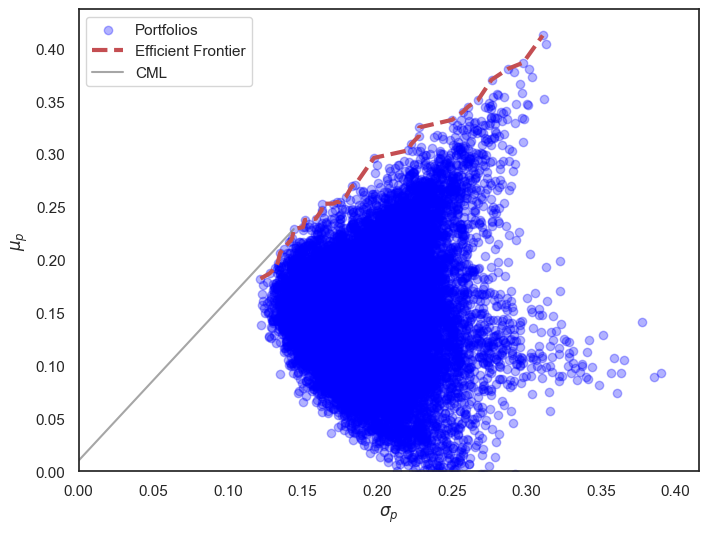

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

long_weights_fun = lambda s: np.exp(s) / np.sum(np.exp(s))

def efficient_frontier(returns, risks):
    idx = np.argsort(risks)
    sorted_risks = risks[idx]
    sorted_returns = returns[idx]
    
    # Find portfolios on the efficient frontier
    frontier_risks = []
    frontier_returns = []

    for i in range(len(sorted_returns)):
        if i == 0 or sorted_returns[i] > frontier_returns[-1]:
            frontier_risks.append(sorted_risks[i])
            frontier_returns.append(sorted_returns[i])
            
    return np.array(frontier_returns), np.array(frontier_risks)


close_prices = pd.read_csv("../data/sp500_close_prices.csv", index_col = "Date")
close_prices.index = pd.to_datetime(close_prices.index)
to_drop = close_prices.columns[(close_prices.isna().sum() > 0)].tolist()
close_prices.drop(to_drop, axis = 1, inplace = True)

log_returns = close_prices.apply(np.log).diff().dropna()
np.random.seed(42)
log_returns = log_returns.loc[:, np.random.choice(log_returns.columns.tolist(), 10, replace = True).tolist()]
df_monthly_returns_log = log_returns.reset_index().groupby(pd.Grouper(key = 'Date', freq = "ME")).sum()
df_monthly_returns = df_monthly_returns_log.apply(lambda x: np.exp(x) - 1)

mu = df_monthly_returns.mean()
Sigma = df_monthly_returns.cov()
n = mu.shape[0]

mpy = []
spy = []
for _ in range(20000):
    s = np.random.normal(size = n)
    w = long_weights_fun(s)
    mu_p = w.dot(mu)
    sigma_p2 = w.dot(Sigma).dot(w)
    mu_p_yearly = mu_p*12
    sigma_p_yearly = np.sqrt(sigma_p2*12)
    mpy.append(mu_p_yearly)
    spy.append(sigma_p_yearly)

frontier_returns, frontier_risks = efficient_frontier(np.array(mpy), np.array(spy))
risk_free_rate = 0.01
sharpe_ratios = (frontier_returns - risk_free_rate) / frontier_risks
max_index = np.argmax(sharpe_ratios)
tangency_return = frontier_returns[max_index]
tangency_risk = frontier_risks[max_index]

fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(spy, mpy, c='blue', marker='o', alpha=0.3, label='Portfolios')
ax.plot(frontier_risks, frontier_returns, 'r--', linewidth=3, label='Efficient Frontier')
ax.plot([0, tangency_risk], [risk_free_rate, tangency_return], c = "grey", alpha = 0.7, label='CML')
ax.legend()
ax.set_xlim(0, max(spy)+0.025)
ax.set_ylim(0, max(mpy)+0.025)
ax.set_xlabel(r"$\sigma_p$")
ax.set_ylabel(r"$\mu_p$")
plt.show()

Let $r_f$ be the risk free rate. Picture this as the rate you can collect risk-less if depositing your money on a bank account. In finance, the risk free rate often is represented by treasury bonds are other assets which are considered to be more or less risk free. If such an opportunity exits, investors invest a fraction $\alpha$ of their money into a risky portfolio and the remainder $1 - \alpha$ is invested risk free. The expected return for every investor is:

$$
\mu = \alpha \mu_p + \left(1 - \alpha \right) r_f
$$

The volatility of their position is:

$$
\sigma = \sqrt{ \alpha^2 \sigma_p + \left(1 - \alpha \right) \cdot 0 } = \alpha \sigma_p
$$

Choosing $\alpha$ places an investor somewhere on the line between $r_f$ and the portfolio she chooses. The slope of the line is the so called *Sharpe ratio*, $SR_p$:

$$
SR_p = \frac{\mu_p - r_f}{\sigma_p}
$$

The Sharpe ratio quantifies the risk adjusted performance of a portfolio and tells the investor how much her excess return increases if she is willing to bear one more unit of risk, i.e., volatility $\sigma_p$. This means every investor would favor the portfolio with the highest Sharpe ratio which is the one on the tangency of the efficient frontier. Thus, investing is only a choice for the fraction invested in the tangency portfolio. 

As for every theory, some deviations to reality do exist:
* The true values of $\boldsymbol{\mu}, \boldsymbol{\Sigma}$ are unknown and are prone to estimation errors
* The tangency portfolio assumes we are able to diversify using the whole universe of stocks listed companies which is unrealistic due to transaction costs and the availability of all stocks
* Capturing risk by a single metric may not be adequate to fully capture investors risk preferences

For a private person this implies it may be a good idea to invest in a broad portfolio such as an Exchange Traded Fund (ETF). For institutional investors this emphasizes the need for large capital access and accurate estimates. 

## Factor models

One consequence of modern portfolio theory is that rational investors all hold the tangency portfolio. If one asset is going to be added to this portfolio, it must have a higher expected return if it has a high level of dependence to the tangency portfolio. This is because of the increase in the portfolio risk when adding an asset with higher dependencies to all assets in the portfolio. This thinking has been formalized by different researchers by means of the capital asset pricing model (CAPM) which is one of the most popular factor models. Factors models in general give us an idea why assets exhibit more or less dependence to other assets and the market, respectively. So let us review a few factor models. A linear factor model assumes the following process for an asset return:

$$
r = \beta_0 + \beta_1 f_{1} + \beta_2 f_{2} + ... + \beta_P f_{m} + \epsilon
$$

$\epsilon$ is a random variable with an expected value of zero and constant variance. The $m$ factors $f_1, f_2, ...., f_m$ are factors which intend to explain the variation of $r$. They can be observable, e.g., a market index, macroeconomic factors, or *latent*. Latent variables are non-observable, however, can be created in different ways by statistical modeling.

```{note}
Usually, the parameters $\boldsymbol{\beta}$ are estimated by means of the linear regression model and its estimator. We did not discuss the model so far in this course. For the moment we assume basic knowledge regarding the linear regression model and come back to it in a later chapter.
```

For the moment, let us assume that $\epsilon = 0$ (no randomness), $\beta_0 = 0$ and we use a single factor model with factor $f$. Given two assets $r_1, r_2$, we can express their value by:

$$
r_1 = \beta_{r_1} f \\
r_2 = \beta_{r_2} f
$$

Re-arranging these equations, we get:

$$
r_1 = \frac{\beta_{r_1}}{\beta_{r_2}} r_2 
$$

or

$$
r_2 = \frac{\beta_{r_2}}{\beta_{r_1}} r_1 
$$

which shows that the dependence between them is perfect and can be fully described by functional relationships $r_1 = g_1 (f), r_2 = g_2 (f)$ that depend on the factor $f$. Once we start to add a random variable each, full (linear dependence) vanishes. However, the extent of dependence can be fully explained by the factor $f$ and each return's exposure to $f$, i.e., $\beta_1, \beta_2$.

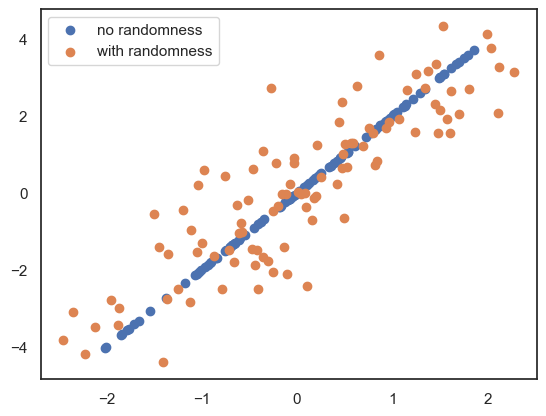

In [12]:
b1 = 1
b2 = 2

f = np.random.normal(size = 100)
e1 = np.random.normal(size = 100)
e2 = np.random.normal(size = 100)

r1 = b1 * f
r2 = b2 * f

s1 = 0.5
s2 = 0.5

r1_ = b1 * f + s1*e1
r2_ = b2 * f + s2*e2

plt.scatter(r1, r2, label = "no randomness")
plt.scatter(r1_, r2_, label = "with randomness")
plt.legend()
plt.show()

In general, if asset return models are of the form:

$$
r_i = \beta_{1i} f_1 + \beta_{2i} f_2 + ... + \beta_{pi} f_m + \epsilon_i
$$

the variance of $r_i$ can be determined by:

$$
\sigma_{r_i}^2 = \boldsymbol{\beta}_i^T \Sigma_f \boldsymbol{\beta}_i + \sigma_{\epsilon_i}^2
$$

where 

$$
\Sigma_f = 
\begin{pmatrix}
\sigma_{f_1}^2 & \sigma_{f_{12}} & ... & \sigma_{f_{1m}} \\
\sigma_{f_{21}} & \sigma_{f_2}^2 & ... & \sigma_{f_{2m}} \\
\vdots &  &\ddots &   \\
\sigma_{f_{m1}} & ... & ... &  \sigma_{f_m}^2 \\
\end{pmatrix}
$$

the covariance between two assets can be determined by:

$$
\sigma_{r_i r_j} = \boldsymbol{\beta}_i^T \Sigma_f \boldsymbol{\beta}_j
$$

Thus, the covariance matrix of asset returns can be determined by:

$$
\Sigma_r = B^T \Sigma_f B + \Sigma_{\epsilon}
$$

where 

$$
B = 
\begin{pmatrix}
\beta_{1i} & \beta_{1j} & ... & \beta_{1n} \\
\beta_{2i} & \beta_{2j} & ... & \beta_{2n} \\
\vdots &  & \ddots & \vdots \\
\beta_{mi} & \beta_{mj} & ... & \beta_{mn} \\
\end{pmatrix}
$$

and 

$$
\Sigma_{\epsilon} = 
\begin{pmatrix}
\sigma_{\epsilon_1}^2 & 0 & ... & 0 \\
0 & \ddots & & \vdots \\
\vdots & & & 0 \\
0 & ... & 0 & \sigma_{\epsilon_n}^2 \\
\end{pmatrix}
$$

Let us take a look at some examples for common factor models. 

### CAPM 

The CAPM is derived upon Markowitz's portfolio theory and uses the excess return of the market as a single risk factor. The excess return is the return of the market portfolio $r_{m}$ over the risk free rate $r_{f}$, i.e., $\widetilde{r}_{m} = r_{m} - r_{f}$. Defining the excess return for asset $i$ as $\widetilde{r}_{i} = r_{i} - r_{f}$, its equation is given by:

$$
\widetilde{r}_{i} = \beta_{i, 0} + \beta_{i, 1} \widetilde{r}_{m} + \epsilon_{i}
$$

```{note}
When we take a look at empirical data, we collect data over time steps $t$. Thus, to be precise, the equation and the ones below should include a time index like:

$$
\widetilde{r}_{t, i} = \beta_{i, 0} + \beta_{i, 1} \widetilde{r}_{t, m} + \epsilon_{t, i}
$$

However, for the sake of a simpler notation, we omit the time index $t$ for the discussion of factor models.
```

The most important theoretical contribution of the CAPM is that it provides an explanation for the *risk premium* of an asset $E\left( r_{i} - r_f \right) = \mu_{i} - r_f$. The stronger the linear dependence to the market portfolio, the higher the return investors demand for the inclusion of an asset in their portfolio as it is less beneficial from a diversification point of view and further enhances the portfolio's risk. 

If the model is accurate $\beta_0$ should not be different from zero and residuals for assets $i, j$ should be independent, i.e., $\text{Cov}\left(\epsilon_{i}, \epsilon_{j} \right) = 0$. The histogram below exhibits estimated values for $\beta_1$ for companies which are currently in the S\&P 500. We use a history of one year, daily returns and Kenneth French's market portfolio which can be accessed [here](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).

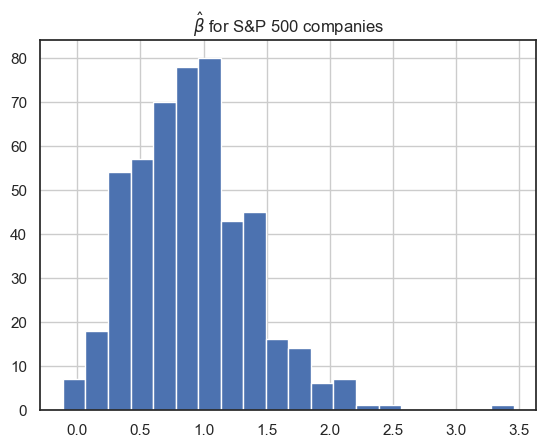

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

df = pd.read_csv("../data/sp500_1y.csv", index_col = "Unnamed: 0")
df.index = pd.to_datetime(df.index)

tickers = df.columns.tolist()[:-4]
betas = []

X = df.loc[:, df.columns.tolist()[-4:-3]]

for ticker in tickers:
    y = df.loc[:, ticker] - df.loc[:, "RF"]
    lr = LinearRegression()
    lr.fit(X, y)
    betas.append(lr.coef_)

betas = pd.DataFrame(betas, index = tickers, columns = [r"Market beta"])
fig, ax = plt.subplots()
betas.hist(bins = 20, ax = ax)
ax.set_title(r"$\hat{\beta}$ for S&P 500 companies")
plt.show()

We observe the majority of estimated betas around 1. Companies with a value higher than 1 react more sensitive towards market movements and companies with values below 1 show less sensitivity. Using a single factor model like this, the variance of the asset's excess return can be determined by:

$$
\widetilde{\sigma}_i^2 = \beta_{i, 1}^2 \widetilde{\sigma}_m^2 + \sigma_{\epsilon_i}^2
$$

This shows us that the asset's risk (measured by its variance) is higher, if the asset reacts more sensitive towards a systematic factor. Furthermore, if assets have higher betas, they also have a higher covariance. This can be shown by using the formula from above in the following way. For the sake of simplicity let us omit $\beta_0$, because it has no impact on the covariance. In general for a single factor model, we have:

$$
r_1 = \beta_{1} f + \epsilon_1 \\
r_2 = \beta_{2} f + \epsilon_2
$$

To determine the covariance between $r_1$ and $r_2$, we need: 

$$
\Sigma_f = 
\begin{pmatrix}
\sigma_f^2
\end{pmatrix}
$$

and 

$$
\Sigma_{\epsilon} = 
\begin{pmatrix}
\sigma_{\epsilon_1} & 0 \\
0 & \sigma_{\epsilon_2}
\end{pmatrix}
$$

We can determine:

$$
\Sigma_r = 
\begin{pmatrix}
\beta_1 \\
\beta_2
\end{pmatrix}
\begin{pmatrix}
\sigma_f^2
\end{pmatrix}
\begin{pmatrix}
\beta_1 & \beta_2 \\
\end{pmatrix}
+ 
\begin{pmatrix}
\sigma_{\epsilon_1}^2 & 0 \\
0 & \sigma_{\epsilon_2}^2
\end{pmatrix} = 
\begin{pmatrix}
\beta_1^2 \sigma_f^2 & \beta_1 \beta_2 \sigma_f^2 \\
\beta_2 \beta_1 \sigma_f^2 & \beta_2^2 \sigma_f^2
\end{pmatrix} + 
\begin{pmatrix}
\sigma_{\epsilon_1}^2 & 0 \\
0 & \sigma_{\epsilon_2}^2
\end{pmatrix}
$$

This demonstrates that, given the variance of the factor, the dependence (in absolute terms) increases, the higher the exposure to the risk factor. The exposure is measured by estimates for $\beta_{1}, \beta_{2}$. Thus, given a factor model, dependencies can be estimated by the factor exposure $\beta$. Note that the above can be done in analogous fashion for multiple assets. Let us take a look at the example below, where we estimate the covariance matrix for the (excess) returns of five companies. One time by the CAPM and one time by the empirical estimator of the covariance matrix. If the single factor of the CAPM is enough to capture dependencies among all companies we should not find any covariance between residuals. As we see below, the pairwise covariance for NVDIA and TSLA is the highest as both companies have the highest beta values, i.e., the highest exposure to the systematic market factor. However, estimated covariances of the residual matrix seem to be different from zero. As covariance numbers are quite small, we also take a look at the correlation matrix which confirms the observations w.r.t. to the existence of non-zero correlation of residuals. This is why the empirical estimate for the covariance matrix is different from the factor based estimate as well. 

Note that this does not speak against the application of a factor model, it just shows us, that dependencies can not be explained by the single market factor. Two advantages which speak for the application of factor models when analyzing dependencies are: (1) factor exposures (betas) provide informative and aggregated numbers which enables us to determine companies with similar and less similar behavior for a large universe of assets (here, the universe is the whole American stock market). (2) For a larger number of assets, the number of parameters which need to be estimated when estimating the covariance matrix with a factor model is usually smaller (depending on the number of factors) than the number of pairwise covariances and individual variances of the empirical covariance estimator. Accordingly, factor models are a little less exposed to statistical uncertainties. 

In [14]:
import numpy as np

companies = ["AAPL", "MSFT", "JPM", "TSLA", "NVDA"]
beta_vec = []
residual_variances = []
residual_mat = []
sigmaf_var = X.var(ddof = 1).values[0]

for ticker in companies:
    y = df.loc[:, ticker] - df.loc[:, "RF"]
    lr = LinearRegression()
    lr.fit(X, y)
    beta_vec.append(lr.coef_[0])
    residuals = y - lr.predict(X)
    residual_mat.append(residuals.values)
    residual_variances.append(residuals.var(ddof = 1))

pd.DataFrame(beta_vec, index = companies, columns = ["beta"])

,beta
AAPL,0.920279
MSFT,1.092655
JPM,0.694994
TSLA,2.003904
NVDA,2.136784


In [15]:
beta_vec = np.array(beta_vec)
covmat_f = beta_vec.reshape(-1, 1).dot(sigmaf_var).dot(beta_vec.reshape(1, -1)) + np.diag(residual_variances)
S_fr = np.diag(np.sqrt(np.diag(covmat_f)))
corrmat_f = np.linalg.inv(S_fr).dot(covmat_f).dot(np.linalg.inv(S_fr))
print("Estimated covariance matrix with the single factor model:")
pd.DataFrame(covmat_f, index = companies, columns = companies)

Estimated covariance matrix with the single factor model:


,AAPL,MSFT,JPM,TSLA,NVDA
AAPL,0.000142,0.000057,0.000036,0.000105,0.000112
MSFT,0.000057,0.000176,0.000043,0.000124,0.000133
JPM,0.000036,0.000043,0.000092,0.000079,0.000084
TSLA,0.000105,0.000124,0.000079,0.000900,0.000243
NVDA,0.000112,0.000133,0.000084,0.000243,0.000953


In [16]:
residual_mat = np.array(residual_mat).transpose()
residuals_cov = np.cov(residual_mat, rowvar=False)
S_e = np.diag(np.sqrt(np.diag(residuals_cov)))
residuals_corr = np.linalg.inv(S_e).dot(residuals_cov).dot(np.linalg.inv(S_e))
print("Estimated covariance matrix for the residuals:")
pd.DataFrame(residuals_cov, index = companies, columns = companies)

Estimated covariance matrix for the residuals:


,AAPL,MSFT,JPM,TSLA,NVDA
AAPL,0.000094,0.000021,-0.000018,0.000019,0.000007
MSFT,0.000021,0.000108,-0.000027,-0.000008,0.000085
JPM,-0.000018,-0.000027,0.000065,-0.000015,-0.000029
TSLA,0.000019,-0.000008,-0.000015,0.000672,-0.000014
NVDA,0.000007,0.000085,-0.000029,-0.000014,0.000694


In [17]:
print("Estimated correlation matrix for the residuals:")
pd.DataFrame(residuals_corr, index = companies, columns = companies)

Estimated correlation matrix for the residuals:


,AAPL,MSFT,JPM,TSLA,NVDA
AAPL,1.000000,0.211733,-0.227661,0.075825,0.025438
MSFT,0.211733,1.000000,-0.321237,-0.028361,0.309429
JPM,-0.227661,-0.321237,1.000000,-0.073071,-0.137600
TSLA,0.075825,-0.028361,-0.073071,1.000000,-0.020435
NVDA,0.025438,0.309429,-0.137600,-0.020435,1.000000


In [18]:
covmat_r = (df.loc[:, companies] - df.loc[:, "RF"].values.reshape(-1, 1)).cov().values
S_r = np.diag(np.sqrt(np.diag(covmat_r)))
corrmat_r = np.linalg.inv(S_r).dot(covmat_r).dot(np.linalg.inv(S_r))
print("Empirical estimate for the covariance matrix:")
pd.DataFrame(covmat_r, index = companies, columns = companies)

Empirical estimate for the covariance matrix:


,AAPL,MSFT,JPM,TSLA,NVDA
AAPL,0.000142,0.000079,0.000019,0.000124,0.000118
MSFT,0.000079,0.000176,0.000016,0.000117,0.000217
JPM,0.000019,0.000016,0.000092,0.000064,0.000055
TSLA,0.000124,0.000117,0.000064,0.000900,0.000229
NVDA,0.000118,0.000217,0.000055,0.000229,0.000953


### Fama-French's three factor model

Researchers identified asset price anomalies which could not be explained by the CAPM single risk factor model. This is what led to the development of Fama-French's three factor model which explained many pricing anomalies from the CAPM. The Fama French model is called a fundamental model because it uses firm fundamentals, i.e., the market and book value, to derive additional risk factors. The equation is given by:

$$
\widetilde{r}_{i} = \beta_{i, 0} + \beta_{i, 1} \widetilde{r}_{m} + \beta_{i, 2} \text{SMB} + \beta_{i, 3} \text{HML} \epsilon_{i}
$$

In addition to the market's asset return, the SMB (small minus big) and HML (high minus low) factors are included. The SMB factor is calculated by constructing two portfolios, one consisting of small stocks and the other of large stocks. The difference in the returns of these two portfolios forms the SMB factor. It aims to capture the historical tendency for smaller companies to outperform larger companies (and being more risky) which is often referred to as the "size premium." The HML factor is used to capture the excess returns of stocks with high book-to-market values over those with low book-to-market values. A low book-to-market value implies market participant's expectation for future growth of the company's value, this is why such companies are called growth stocks. The opposite is called value stock. 

If we want to imagine why such a model is (among other things) well suited to explain dependencies of assets, you may picture the size and the book-to-market factor as approximations which capture financial conditions for companies. For instance, smaller companies may have less diversified business operations and different channels to external capital in comparison to larger companies. If conditions on financial markets change with this respect, the group of smaller companies may share similar value developments that are different from the ones of larger companies.

One pleasant characteristic of the three factor model is the interpretation of the three estimated beta values:

* $\beta_{i, 1}$ : sensitivity to the market
* $\beta_{i, 2}$ : values higher than zero imply that the company's development is like the one of smaller companies and vice versa
* $\beta_{i, 3}$ : values higher than zero imply that the company's development is like the one of value stocks, negative values indicate growth of the company

Below, we observe the betas for the companies from before. The negative signs for $\beta_{i, 2}$ are not surprising as these companies belong the largest companies globally. The positive sign of TSLA (Tesla) demonstrates, that even asset returns of large companies can behave like the ones of smaller companies. The negative signs of $\beta_{i, 3}$ indicates current market expectations for all companies to even grow further in the future, except JPM (JP Morgan). 

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("../data/sp500_1y.csv", index_col = "Unnamed: 0")
df.index = pd.to_datetime(df.index)

tickers = df.columns.tolist()[:-4]
betas = []

companies = ["AAPL", "MSFT", "JPM", "TSLA", "NVDA"]

residual_variances = []
residual_mat = []

X = df.loc[:, df.columns.tolist()[-4:-1]]

for ticker in tickers:
    y = df.loc[:, ticker] - df.loc[:, "RF"]
    lr = LinearRegression()
    lr.fit(X, y)
    betas.append(lr.coef_)
    if ticker in companies:
        residuals = y - lr.predict(X)
        residual_mat.append(residuals.values)
        residual_variances.append(residuals.var(ddof = 1))

betas = pd.DataFrame(betas, index = tickers, columns = ["Market", "SMB", "HML"]) 
beta_companies = betas.loc[companies, :]
beta_companies

,Market,SMB,HML
AAPL,0.924259,-0.024405,-0.484544
MSFT,1.231011,-0.431292,-0.608541
JPM,0.760143,-0.178388,0.674961
TSLA,1.818031,0.542406,-0.623020
NVDA,2.441900,-0.940775,-0.939086


For the three factor model, the covariance matrix can be estimated as well. Given the formula, we know that companies with similar factor exposures $\boldsymbol{\beta}_i, \boldsymbol{\beta}_j$ will exhibit high pairwise covariance. This makes the three factor model a powerful way to identify companies with low and little dependencies in a large universe of assets. If we continue our example from the CAPM below, we observe that correlations in the residuals of the three factor model significantly decrease which indicates a better capability of the three factors to capture the similar development of these assets. 

In [20]:
Sigma_F = X.cov()
Sigma_e = np.diag(residual_variances)
covmat_f = beta_companies.values.dot(Sigma_F.values).dot(beta_companies.values.transpose()) + Sigma_e
S_fr = np.diag(np.sqrt(np.diag(covmat_f)))
corrmat_f = np.linalg.inv(S_fr).dot(covmat_f).dot(np.linalg.inv(S_fr))
print("Estimated covariance matrix with the three factor model:")
pd.DataFrame(covmat_f, index = companies, columns = companies)

Estimated covariance matrix with the three factor model:


,AAPL,MSFT,JPM,TSLA,NVDA
AAPL,0.000142,0.000076,0.000023,0.000113,0.000144
MSFT,0.000076,0.000153,0.000024,0.000129,0.000200
JPM,0.000023,0.000024,0.000115,0.000065,0.000054
TSLA,0.000113,0.000129,0.000065,0.000817,0.000246
NVDA,0.000144,0.000200,0.000054,0.000246,0.001036


In [21]:
residual_mat = np.array(residual_mat).transpose()
residuals_cov = np.cov(residual_mat, rowvar=False)
S_e = np.diag(np.sqrt(np.diag(residuals_cov)))
residuals_corr = np.linalg.inv(S_e).dot(residuals_cov).dot(np.linalg.inv(S_e))
print("Estimated covariance matrix for the residuals:")
pd.DataFrame(residuals_cov, index = companies, columns = companies)

Estimated covariance matrix for the residuals:


,AAPL,MSFT,JPM,TSLA,NVDA
AAPL,0.000083,-4.365711e-06,0.000002,-0.000026,1.101722e-05
MSFT,-0.000004,4.702487e-05,-0.000008,0.000001,-8.291366e-07
JPM,0.000002,-7.983194e-06,0.000070,0.000017,-1.181130e-05
TSLA,-0.000026,1.300448e-06,0.000017,0.000570,-1.630627e-05
NVDA,0.000011,-8.291366e-07,-0.000012,-0.000016,6.526449e-04


In [22]:
print("Estimated correlation matrix for the residuals:")
pd.DataFrame(residuals_corr, index = companies, columns = companies)

Estimated correlation matrix for the residuals:


,AAPL,MSFT,JPM,TSLA,NVDA
AAPL,1.000000,-0.069889,0.032760,-0.118302,0.047343
MSFT,-0.069889,1.000000,-0.139002,0.007941,-0.004733
JPM,0.032760,-0.139002,1.000000,0.084177,-0.055203
TSLA,-0.118302,0.007941,0.084177,1.000000,-0.026726
NVDA,0.047343,-0.004733,-0.055203,-0.026726,1.000000


To determine the similarity of beta vectors, we can use pairwise similarity measures such as the **euclidean distance** or the **cosine similarity**. The former is defined by:

$$
d(\boldsymbol{\beta}_i, \boldsymbol{\beta}_j) = \sqrt{\sum_{k=1}^m (\beta_{i, k} - \beta_{j, k})^2}
$$

with smaller values indicating more similar exposure to risk factors. The cosine similarity is defined by:

$$
\text{cos}(\boldsymbol{\beta}_i, \boldsymbol{\beta}_j) = \frac{\boldsymbol{\beta}_i^T \boldsymbol{\beta}_j}{\|\boldsymbol{\beta}_i\| \|\boldsymbol{\beta}_i\|} = \frac{\sum_{k=1}^m \beta_{i, k} \beta_{j, k}}{\sqrt{\sum_{k=1}^m \beta_{i, k}^2} \sqrt{\sum_{k=1}^m \beta_{j, k}^2}}
$$

Note that both measures condense the information and are not perfectly in line with the level of dependence. However, these similarities are good indications for systematic co-movements. See for yourself in the cells below which exhibit the pairwise cosine similarities of beta vectors from the Fama French model and the empirical estimate for the correlation matrix.

In [23]:
print("Empirical estimate of the correlation matrix:")
pd.DataFrame(corrmat_r, index = companies, columns = companies)

Empirical estimate of the correlation matrix:


,AAPL,MSFT,JPM,TSLA,NVDA
AAPL,1.000000,0.496178,0.162075,0.346018,0.320900
MSFT,0.496178,1.000000,0.128392,0.293776,0.531046
JPM,0.162075,0.128392,1.000000,0.222045,0.186475
TSLA,0.346018,0.293776,0.222045,1.000000,0.247699
NVDA,0.320900,0.531046,0.186475,0.247699,1.000000


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

print("Pairwise cosine similarities for Fama French Betas:")
pd.DataFrame(cosine_similarity(beta_companies), index = companies, columns = companies)

Pairwise cosine similarities for Fama French Betas:


,AAPL,MSFT,JPM,TSLA,NVDA
AAPL,1.000000,0.960527,0.352600,0.944592,0.942372
MSFT,0.960527,1.000000,0.405200,0.829166,0.995370
JPM,0.352600,0.405200,1.000000,0.419554,0.484469
TSLA,0.944592,0.829166,0.419554,1.000000,0.813100
NVDA,0.942372,0.995370,0.484469,0.813100,1.000000


A broader visual inspection of companies with similar and different factor exposures for the companies of the S\&P 500 are presented below. 

In [25]:
import plotly.express as px

fig = px.scatter_3d(betas, x='Market', y='SMB', z='HML', color = "Market", hover_name=betas.index)
fig.update_layout(width = 800, height = 800)
fig.show()

### Macroeconomic factor models

As companies may be impacted by the economy and its conditions as a whole, macroeconomic factor models have been developed as well. These models use macroeconomic data such as the GDP, interest rate levels, inflation, etc. to explain the variation in asset returns. Usually it is not the variable itself, e.g., the GDP which is used, it is rather the unexpected change in the factor which is derived by other models. However, these models tend to have little explanatory power in comparison to fundamental models which is why they are rarely applied. 

### Statistical factor models

Statistical factor models extract factors that explain the returns of a broad set of assets based on the covariance of returns among those assets. Examples are principal component analysis, explanatory or confirmatory factor analysis. The factor variables are not observable, however, are build as the output from other statistical models. We take a look how principal component analysis does this at a later point in the course. The advantage in comparison to established fundamental models is that we do not need any data other than returns. This can be quite a relief as, e.g., size of value factors must be derived by data which usually is not available for free and is hard to get for a large amount of companies.

No matter which factor model, the benefit of these models is that their estimated factor exposures allow a more global analysis which companies are more or less dependent to the market and certain subgroups of other companies. Furthermore, the deepen the understanding for the source of dependence. Even though, factors may be an approximation for a granular set of variables which are the actual source for similar developments of assets, they enable a perspective on dependence which is quite intuitive. 

### Systematic and idiosyncratic risk 

Following on from that, we can also show why diversified investors only care about the risk which evolves from the the exposure to systematic risk factors and not the overall level of a return's volatility. 

Let us assume an investor which determines risk by a single factor model and who holds a naive portfolio.  The portfolio return is:

$$
r_{p} =  w_1 r_{1} + ... + w_n r_{n}
$$

Using the single factor model (and setting $\beta_0 = 0$), for each asset we have:

$$
r_{i} = \beta_{i, 0} + \beta_{i, 1} f + \epsilon_{i}
$$

Inserting this equation into the portfolio return equation, we get:

$$
r_{p} = \sum_i \beta_{i, 0} w_i + \sum_i \beta_{i, 1} w_i f + \sum_i w_i \epsilon_{i}
$$

The residuals are assumed to be independent and the risk factor is independent to each residual. Simply applying the formula for the variance of a random variable which is a combination of random variables, we get:

$$
\sigma_p^2 = \left(\sum_i w_i \beta_{i, 1}\right)^2 \sigma_f^2 + \sum_i w_i^2 \sigma_{\epsilon_i}^2 
$$

Even though it is difficult to precisely derive the limit of $\sigma_p^2$ for an increasing number of assets in a portfolio, it can be shown that $\sum_i w_i^2 \sigma_{\epsilon_i}^2$ converges towards zero under the assumption of a naive portfolio with identical residual variance. Even without these assumptions, we know that $w_i$ tends to become smaller for large diversified portfolios which strongly reduces $\sum_i w_i^2 \sigma_{\epsilon_i}^2$. At the same time, the weighted sum of beta coefficients does not necessarily decrease for larger portfolios given individual assets are exposed to systematic market movements. More specifically, for a very large portfolio:

$$
\sum_i w_i \beta_{i, 1} \approx \beta_m = 1
$$

as a large diversified portfolio is close to the whole market itself. 

As a consequence, the risk related to systematic factors is called *systematic* risk while the risk which can be eliminated by diversification is called *idiosyncratic* or *firm specific*. Going back to an individual asset under a single factor model we have:

$$
r_{i} = \beta_{i, 0} + \beta_{i, 1} f + \epsilon_{i}
$$

and its variance can be determined by:

$$
\sigma_{r_i}^2 = \underbrace{ \beta_{i, 1}^2 \sigma_f^2 }_{\text{systematic}} + \underbrace{\sigma_{\epsilon_i}}_{\text{idiosyncratic}} 
$$

As discussed above, the idiosyncratic part can be eliminated if investors hold large portfolios. This is why this source of risk is also referred to as firm specific or asset specific risk. Even though the formula gets longer for models with more than one risk factor, the key finding stays the same.

## Interim conclusion: Examining dependencies

Summing up what we achieved so far is a detailed point of view on the dependencies. As an example we take a look at the dependencies for the companies from our previous examples. This time, we determine all estimates with a time series between January 2022 until March 2024. The visualization below exhibits Bravais-Pearson, Spearman and tail dependence matrices, whereby, the latter has been estimated assuming a multivariate t distribution for every pair of stocks. We observe relatively large positive dependencies overall. For this example the deviations between Bravais Pearson and Spearman are moderate, substantial tail dependencies between Apple and Microsoft as well as between Microsoft and Nividia.

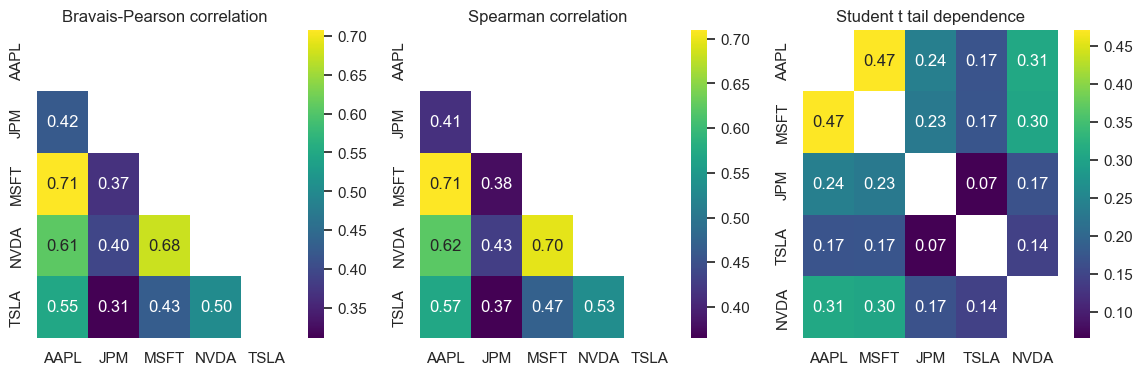

In [26]:
import pandas as pd
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import FloatVector
from rpy2.robjects import pandas2ri

df = pd.read_csv("../data/AAPL_MSFT_JPM_TSLA_NVDA_5y.csv", index_col="Date")
df.index = pd.to_datetime(df.index)
df = df.loc[pd.to_datetime("2021-12-31"):]

corr_mat = df.corr()
corr_mat_sp = df.corr(method = "spearman")

# Activate the automatic conversion between R and pandas DataFrames
pandas2ri.activate()

# Import R's utility package to install missing packages
utils = rpackages.importr('utils')

# Load the VineCopula package
VineCopula = rpackages.importr('VineCopula')

def t_copula_estimate(df_U, x, y):
    u1, u2 = FloatVector(df_U.loc[:, x]), FloatVector(df_U.loc[:, y])
    student_copula = VineCopula.BiCopEst(u1, u2, family = 2)
    rho = student_copula[1]
    nu = student_copula[2]
    return rho, nu

lu_coefs = np.zeros(shape = (len(companies), len(companies)))

for i in range(len(companies)):
    for j in range(i+1, len(companies)):
        rho_tmp, nu_tmp = t_copula_estimate(df_pseudo_U, companies[i], companies[j])
        lambda_ = pairwise_tail_dependence(nu_tmp, rho_tmp)[0]
        lu_coefs[j, i] = lambda_
        lu_coefs[i, j] = lambda_
        
lu_coefs = pd.DataFrame(lu_coefs, index = companies, columns = companies)

fig, axs = plt.subplots(1,3, figsize = (14, 4))

corr_mat = df.corr()
corr_mat_sp = df.corr(method = "spearman")
mask = np.triu(np.ones_like(corr_mat, dtype=bool), k = 0)

sns.heatmap(corr_mat, ax = axs[0], cmap = 'viridis', annot=True, fmt=".2f", mask = mask)
sns.heatmap(corr_mat_sp, ax = axs[1], cmap = 'viridis', annot=True, fmt=".2f", mask = mask)
sns.heatmap(lu_coefs, ax = axs[2], cmap = 'viridis', annot=True, fmt=".2f", mask = np.eye(len(companies)))
axs[0].set_title("Bravais-Pearson correlation")
axs[1].set_title("Spearman correlation")
axs[2].set_title("Student t tail dependence")
plt.show()

Furthermore, when we examine the beta coefficients from the three factor model, we observe that Nividia and Tesla exhibit the highest sensitivity towards the market which implies that both companies likely have high pairwise correlations to a large number of companies. Among those five companies, Apple has the largest pairwise similarities in terms of the systematic factor exposure.

In [27]:
from sklearn.linear_model import LinearRegression

ff = pd.read_csv("../data/ff_data.csv", index_col = "date")
ff.index = pd.to_datetime(ff.index)
df_ff = df.merge(ff, left_index=True, right_index = True)

betas = []

X = df_ff.loc[:, df_ff.columns.tolist()[-4:-1]]

for ticker in companies:
    y = df_ff.loc[:, ticker] - df_ff.loc[:, "RF"]
    lr = LinearRegression()
    lr.fit(X, y)
    betas.append(lr.coef_)

betas = pd.DataFrame(betas, index = companies, columns = ["Market", "SMB", "HML"]) 
betas

,Market,SMB,HML
AAPL,1.138161,-0.310043,-0.306105
MSFT,1.120174,-0.592566,-0.543646
JPM,1.049820,-0.156685,0.585533
TSLA,1.507769,0.535077,-0.652962
NVDA,1.911540,-0.409070,-0.882916


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

print("Pairwise cosine similarities for Fama French Betas:")
pd.DataFrame(cosine_similarity(betas), index = companies, columns = companies)

Pairwise cosine similarities for Fama French Betas:


,AAPL,MSFT,JPM,TSLA,NVDA
AAPL,1.000000,0.967006,0.720346,0.831013,0.984186
MSFT,0.967006,1.000000,0.568618,0.724717,0.968178
JPM,0.720346,0.568618,1.000000,0.533099,0.597604
TSLA,0.831013,0.724717,0.533099,1.000000,0.874076
NVDA,0.984186,0.968178,0.597604,0.874076,1.000000


In [29]:
pd.DataFrame(cosine_similarity(betas), index = companies, columns = companies).sum()

AAPL    4.502552
MSFT    4.228519
JPM     3.419667
TSLA    3.962905
NVDA    4.424044
dtype: float64

## Time-varying dependence

One reason for extreme joint events may be related to varying dependence levels over time which are higher during crisis periods. In analogy to the previous chapter in which we examined the AR(1)-GARCH(1, 1) model, it is possible to model time-varying correlation and covariance, respectively. 

### Vector autoregressive models

Furthermore, the idea of autoregressive models can be expanded to vector autoregressive models (VAR) which take into account previous observations from other time series as well. 

For instance, a two-dimensional VAR model using a lag of one, would be defined by:

$$
\begin{pmatrix}
r_{1,t} \\
r_{2,t}
\end{pmatrix}
=
\begin{pmatrix}
\mu_1 \\
\mu_2
\end{pmatrix}
+
\begin{pmatrix}
\phi_{11,1} & \phi_{12,1} \\
\phi_{21,1} & \phi_{22,1}
\end{pmatrix}
\begin{pmatrix}
r_{1,t-1} \\
r_{2,t-1}
\end{pmatrix}
+
\begin{pmatrix}
\epsilon_{1,t} \\
\epsilon_{2,t}
\end{pmatrix}
$$

Thus, we generate two equations for the two return time series:

$$
r_{1,t} = \mu_1 + \phi_{11,1} r_{1,t-1} + \phi_{12,1} r_{2,t-1} + \epsilon_{1,t} \\
r_{2,t} = \mu_2 + \phi_{21,1} r_{1,t-1} + \phi_{22,1} r_{2,t-1} + \epsilon_{2,t}
$$

Usually the parameters of the these models are estimated by ordinary least squares minimization or maximum likelihood estimation. The output in the cell below exhibits the estimated parameters for Apple and Microsoft using daily returns since 2019. We observe that only Apple may have an impact on Microsoft and not the other way around. At least if we only interpret parameters to be different from zero if the corresponding hypothesis test rejects the hypothesis for a a zero impact (usually most researchers assume a p-value of $0.05$, values below speak against the null hypothesis of no impact).

However, for daily return data such models are of rather little predictive performance. Nevertheless the VAR model finds many applications in finance and economics. Examples are macroeconomic forecasting, analyzing the impact of monetary policy on variables like inflation, unemployment, stock market developments, examining interrelations among financial variables such as stock market development, interest rates, exchange rates and commodity rates, etc.

In [30]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
import pandas as pd
import matplotlib.pylab as plt

ro.r('library(vars)')
ro.r('library(xts)')

pandas2ri.activate()

var_estimate = """
    file_path <- '/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/FDAML/data/AAPL_MSFT_JPM_TSLA_NVDA_5y.csv'

    # Read the CSV file
    data <- read.csv(file_path)

    # Convert the Date column to Date format
    data$Date <- as.Date(data$Date, format="%Y-%m-%d")

    # Extract the AAPL and MSFT columns and convert to xts object
    returns <- xts(data[, c("AAPL", "MSFT")], order.by = data$Date)

    var_model <- VAR(returns, p = 1, type = "const")
    var_summary <- summary(var_model)
    mu_t <- data.frame(Date = index(returns)[2:length(index(returns))], fitted(var_model))
    rownames(mu_t) = mu_t$Date
"""

ro.r(var_estimate)
var_summary = ro.r('capture.output(var_summary)')
for line in var_summary:
    print(line)
mu_t = ro.r('mu_t')
mu_t_pd = pandas2ri.rpy2py(mu_t)
mu_t_pd.index = pd.to_datetime(mu_t_pd.index)
mu_t_pd.drop(["Date"], axis = 1).plot(alpha = 0.5, title = "Time-varying expectations")
plt.show()

R[write to console]: Lade nötiges Paket: MASS

R[write to console]: Lade nötiges Paket: strucchange

R[write to console]: Lade nötiges Paket: zoo

R[write to console]: 
Attache Paket: ‘zoo’


R[write to console]: Die folgenden Objekte sind maskiert von ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: Lade nötiges Paket: sandwich

R[write to console]: Lade nötiges Paket: urca

R[write to console]: Lade nötiges Paket: lmtest

R[write to console]: Fehler in file(file, "rt") : kann Verbindung nicht öffnen

R[write to console]: Zusätzlich: 
R[write to console]: Warnmeldung:

R[write to console]: In file(file, "rt") :
R[write to console]: 
 
R[write to console]:  kann Datei '/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/NEW/data/AAPL_MSFT_JPM_TSLA_NVDA_5y.csv' nicht öffnen: No such file or directory



RRuntimeError: Fehler in file(file, "rt") : kann Verbindung nicht öffnen


### Dynamic conditional correlation modeling

While dynamic dependence modeling is available in the form of different approaches, one of the approaches which can be seen as a natural extension to the univariate GARCH model is the dynamic conditional correlation (DCC) model.

The Dynamic Conditional Correlation (DCC) model combines univariate GARCH models for individual time series with a dynamic correlation structure. Given the univariate GARCH models for every asset $i$:

$$
r_{t, i} = \mu_{t, i} +  \epsilon_{t, i} \\
\epsilon_{t, i} = \sigma_{t, i} e_{t, i} \\
\sigma_{t, i}^2 = \omega_i + \alpha_i \epsilon_{t, i-1}^2 + \beta_i \sigma_{t, i-1}^2
$$

The DCC model specifies how the correlation matrix evolves over time.
a. Conditional Covariance Matrix:

The conditional covariance matrix $H_t$​ at time $t$ is given by:

$$
H_t = D_t R_t D_t
$$

where:

$$
D_t = \text{diag}(\sigma_{t, 1}, \sigma_{t, i}, \ldots, \sigma_{t, n})
$$

is a diagonal matrix of conditional standard deviations. The time-varying correlation matrix $R_t$ is modeled as:

$$
R_t = (Q_t^*)^{-1} Q_t (Q_t^*)^{-1}
$$

where 

$$
Q_t^* = \text{diag}(\sqrt{q_{t, 11}}, \sqrt{q_{t, 11}}, \ldots, \sqrt{q_{t, nn}})
$$

The evolution of $ Q_t $ is given by:

$$
Q_t = (1 - \alpha - \beta) \bar{Q} + \alpha (e_{t-1} e_{t-1}^T) + \beta Q_{t-1}
$$

* $Q_t$ is the covariance matrix of the standardized residuals $e_{t, i}$
* $Q_t^*$ is the diagonal matrix with the square roots of the diagonal elements of $Q_t$ 

While the formal presentation of the model may seem rather complex, we can see the similarity to the univariate GARCH model when looking at the formula for $Q_t$.

* $(1 - \alpha - \beta) \bar{Q}$ represents a baseline covariance as $\bar{Q}$ is the unconditional covariance matrix of the innovations $e_{t, i}$
* $\alpha$ quantifies the impact of current co-movement shocks
* $\beta$ determines the lasting effect of previous dependence levels

The parameters of the DCC model are usually estimated by a two step maximum likelihood estimation approach which first estimates the parameters of the univariate GARCH (and $\mu_t$) models and estimates the DCC parameters from the innovations $e_{t, i}$. The latter are mean and standard deviation filtered versions of the original input data which still include all possible dependencies. Common assumptions for the maximum likelihood estimation are multivariate normal or t distributions.

The cell below illustrates the estimated parameters for the GARCH and DCC model for Apple and Microsoft using daily data since 2019. The plot visualizes the estimated correlation and exhibits its dynamic structure. Especially the large increase in dependence during the Covid crisis if important for risk management purposes. 

R[write to console]: Lade nötiges Paket: rugarch

R[write to console]: Lade nötiges Paket: parallel

R[write to console]: 
Attache Paket: ‘rugarch’


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    sigma


R[write to console]: 
Attache Paket: ‘rmgarch’


R[write to console]: Die folgenden Objekte sind maskiert von ‘package:xts’:

    first, last





*---------------------------------*
*          DCC GARCH Fit          *
*---------------------------------*

Distribution         :  mvnorm
Model                :  DCC(1,1)
No. Parameters       :  13
[VAR GARCH DCC UncQ] : [0+10+2+1]
No. Series           :  2
No. Obs.             :  1258
Log-Likelihood       :  7032.549
Av.Log-Likelihood    :  5.59 

Optimal Parameters
-----------------------------------
               Estimate  Std. Error   t value Pr(>|t|)
[AAPL].mu      0.001900    0.000470  4.045820 0.000052
[AAPL].ar1    -0.022291    0.031705 -0.703063 0.482016
[AAPL].omega   0.000011    0.000003  3.587904 0.000333
[AAPL].alpha1  0.096714    0.014691  6.583035 0.000000
[AAPL].beta1   0.873946    0.011578 75.484908 0.000000
[MSFT].mu      0.001482    0.000443  3.347557 0.000815
[MSFT].ar1    -0.084506    0.058180 -1.452478 0.146369
[MSFT].omega   0.000007    0.000302  0.021964 0.982476
[MSFT].alpha1  0.103459    0.235154  0.439961 0.659965
[MSFT].beta1   0.879432    0.893519  0.98

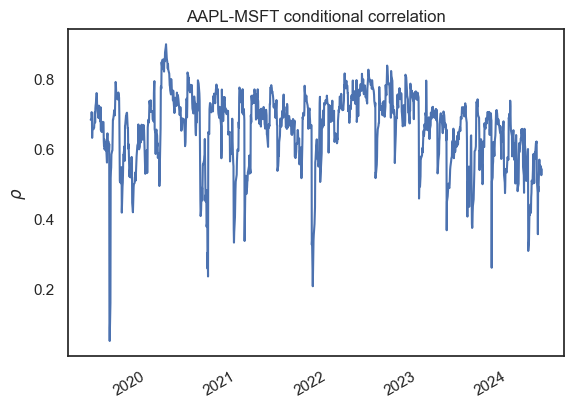

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
import pandas as pd
import matplotlib.pylab as plt

ro.r('library(rmgarch)')
ro.r('library(xts)')

pandas2ri.activate()

dcc_extract_correlation = """
    # Define the file path
    file_path <- '/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/FDAML/data/AAPL_MSFT_JPM_TSLA_NVDA_5y.csv'

    # Read the CSV file
    data <- read.csv(file_path)

    # Convert the Date column to Date format
    data$Date <- as.Date(data$Date, format="%Y-%m-%d")

    # Extract the AAPL and MSFT columns and convert to xts object
    returns <- xts(data[, c("AAPL", "MSFT")], order.by = data$Date)

    # Specify the univariate GARCH models for each series
    uspec <- ugarchspec(mean.model = list(armaOrder = c(1, 0)), 
                        variance.model = list(model = "sGARCH"), 
                        distribution.model = "norm")

    # Specify the DCC model
    spec <- dccspec(uspec = multispec(replicate(2, uspec)), 
                    dccOrder = c(1, 1), 
                    distribution = "mvnorm")

    # Fit the DCC model
    fit <- dccfit(spec, data = returns)

    # Plot the conditional correlations
    conditional_correlations <- rcor(fit)

    # Convert the conditional correlations to a data frame
    conditional_correlations_df <- data.frame(Date = index(returns), 
                                            Conditional_Correlation = conditional_correlations[1, 2, ])

"""
ro.r(dcc_extract_correlation)
conditional_correlations_df = ro.globalenv['conditional_correlations_df']
fit_summary = ro.r('capture.output(fit)')
for line in fit_summary:
    print(line)
cond_corr_pd = pandas2ri.rpy2py(conditional_correlations_df)
cond_corr_pd.index = pd.to_datetime(cond_corr_pd.index)
cond_corr_pd.drop(["Date"], axis = 1, inplace = True)
cond_corr_pd.plot(legend = False, title = "AAPL-MSFT conditional correlation", ylabel = r"$\rho$")
plt.show()

## Summary

The main findings of this chapter can be summarized by the following key points

* Dependencies are crucial for assessing risk reduction (diversification) effects and the overall level of risk when holding more than one asset
* Dependencies which are due to the common exposure to systematic risk factors are most relevant as firm specific risks can be diversified when holding large portfolios
* Linear dependence measures may not adequately capture dependence levels, especially if dependencies are non-linear
* A measure which captures the probability for extreme co-movements is provided by tail dependence
* Dependence levels can also vary over time and are usually larger during crisis periods